In [1]:
!git clone https://github.com/taipingeric/yolo-v4-tf.keras

Cloning into 'yolo-v4-tf.keras'...
remote: Enumerating objects: 1377, done.
remote: Total 1377 (delta 0), reused 0 (delta 0), pack-reused 1377
Receiving objects: 100% (1377/1377), 29.82 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (714/714), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

Downloading...
From: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /content/yolov4.weights
258MB [00:03, 79.7MB/s]


In [ ]:
import sys
FOLDER_PATH = '/content/yolo-v4-tf.keras/'
sys.path.append(FOLDER_PATH)

In [ ]:
import cv2
import numpy as np
import os
from models import Yolov4

# Building del modello Yolo
model = Yolov4(class_name_path = os.path.join(FOLDER_PATH, 'class_names', 'coco_classes.txt'),
               weight_path='yolov4.weights')

nms iou: 0.413 score: 0.3
all weights read
load from yolov4.weights


img shape:  (421, 656, 3)
# of bboxes: 1


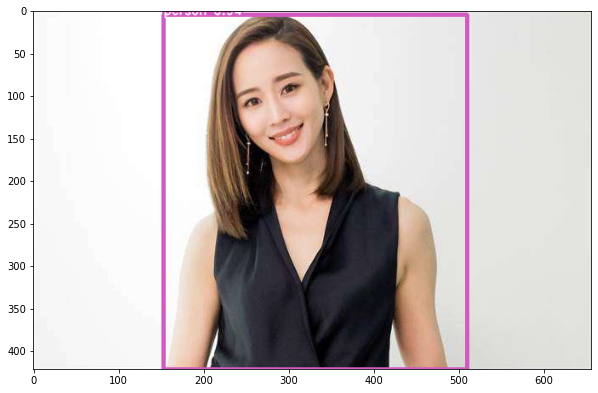

x1  y1   x2   y2 class_name     score    w    h
0  153   5  510  421     person  0.944653  357  416

In [ ]:
model.predict(os.path.join(FOLDER_PATH, 'img', 'test3.jpg'), random_color=True)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

class CustomStopper(EarlyStopping):
    def __init__(self, monitor='val_loss',
             min_delta=0, patience=0, verbose=0, mode='auto', start_epoch=100): 
        super(CustomStopper, self).__init__(monitor=monitor,patience=patience,min_delta=min_delta,mode=mode)
        self.start_epoch = start_epoch
        self.patience = patience

    def on_epoch_end(self, epoch, logs=None):
        print("%d > %d, patience = %d" %(epoch,self.start_epoch,self.patience))
        if epoch > self.start_epoch:
            super().on_epoch_end(epoch, logs) 

Training del modello:

In [ ]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
import tensorflow as tf

train_lines, val_lines = read_annotation_lines('/content/drive/MyDrive/dataset_augmentation/_annotations.txt', test_size=0.1)
FOLDER_PATH = '/content/drive/MyDrive/dataset_augmentation'
class_name_path = '/content/drive/MyDrive/dataset_augmentation/_classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)

model1 = Yolov4(weight_path='/content/yolov4.weights',
               class_name_path=class_name_path)

callback = [CustomStopper(monitor='val_loss', patience=5, start_epoch=35),
             ModelCheckpoint(filepath='/content/drive/MyDrive/best_model_call.h5', monitor='val_loss', save_best_only=True)]

#model1.load_model('/content/drive/MyDrive/model.h5')

history = model1.fit(data_gen_train,
          initial_epoch=0,
          epochs=50,
          val_data_gen=data_gen_val,
          callbacks=callback)

nms iou: 0.413 score: 0.3
failed to read  all weights, # of unread weights: 0
load from /content/yolov4.weights
Epoch 1/50
1043/1043 [==============================] - 3987s 4s/step - loss: 2680.9632 - val_loss: 79.4279
0 > 35, patience = 5
Epoch 2/50
1043/1043 [==============================] - 685s 656ms/step - loss: 62.6803 - val_loss: 55.6165
1 > 35, patience = 5
Epoch 3/50
1043/1043 [==============================] - 691s 658ms/step - loss: 40.3494 - val_loss: 67.5841
2 > 35, patience = 5
Epoch 4/50
1043/1043 [==============================] - 686s 658ms/step - loss: 36.4987 - val_loss: 43.6790
3 > 35, patience = 5
Epoch 5/50
1043/1043 [==============================] - 685s 657ms/step - loss: 31.0091 - val_loss: 54.4559
4 > 35, patience = 5
Epoch 6/50
1043/1043 [==============================] - 685s 657ms/step - loss: 28.2826 - val_loss: 41.8453
5 > 35, patience = 5
Epoch 7/50
1043/1043 [==============================] - 685s 657ms/step - loss: 28.4093 - val_loss: 40.6409
6 > 35

Predict su augmentation:

img shape:  (416, 416, 3)
# of bboxes: 8


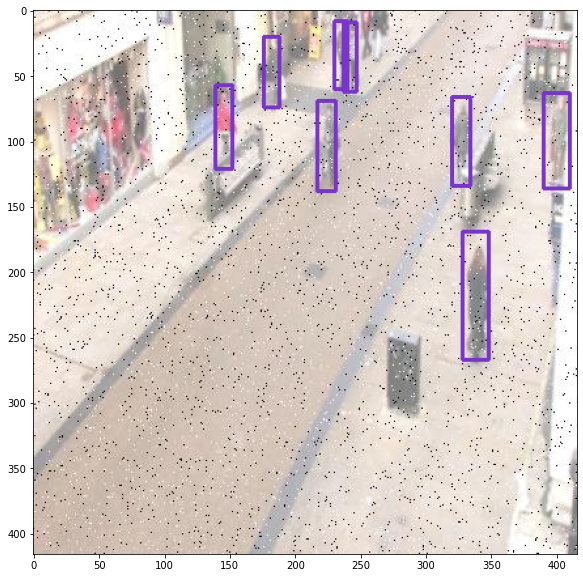

x1   y1   x2   y2  class_name     score   w   h
0  328  169  348  267  pedestrian  0.993879  20  98
1  139   57  152  121  pedestrian  0.992952  13  64
2  217   69  231  138  pedestrian  0.991816  14  69
3  390   63  410  136  pedestrian  0.989592  20  73
4  320   66  334  134  pedestrian  0.986983  14  68
5  176   20  188   74  pedestrian  0.985565  12  54
6  237    9  247   62  pedestrian  0.985320  10  53
7  230    8  240   60  pedestrian  0.963597  10  52

In [ ]:
model1.predict('/content/drive/MyDrive/dataset_augmentation/3087_jpg.rf.c9a9de1a53193eff421ad3482720b78b.jpg', random_color=False, show_text=False)

Salvataggio del modello per simulazioni future:

In [ ]:
model1.save_model('/content/drive/MyDrive/output_train/model_weights_augmentation.h5')

Loss, mAP, Precision e Recall:

dict_keys(['loss', 'val_loss'])


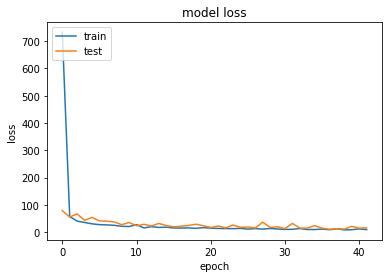

100%|██████████| 1545/1545 [26:42<00:00,  1.04s/it]


['pedestrian'] {'pedestrian': 47732}
fp  6336
tp  44980
recall  44980
prec  44980
93.92% = pedestrian AP 


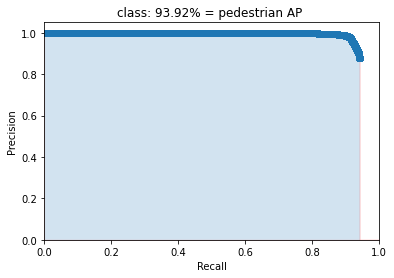

mAP = 93.92%
[('pedestrian', 47732)]


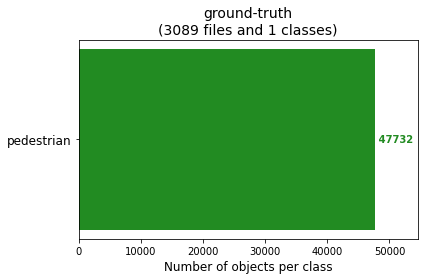

[('pedestrian', 51316)]


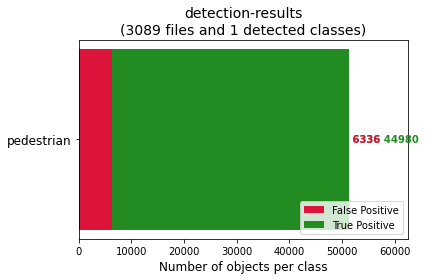

[('pedestrian', 0.939200484163407)]


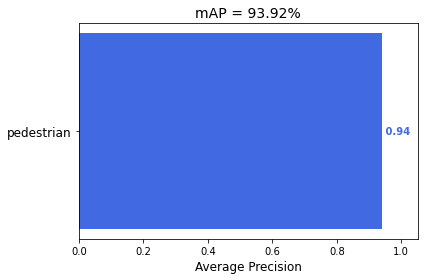

In [ ]:
import matplotlib.pyplot as plt

print(model1.training_model.history.history.keys())
loss = model1.training_model.history.history['loss']
val_loss = model1.training_model.history.history['val_loss']

plt.plot(model1.training_model.history.history['loss'])
plt.plot(model1.training_model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

FOLDER_PATH = '/content/drive/MyDrive/train'
model1.export_gt('/content/drive/MyDrive/train/_annotations.txt', '/content/drive/MyDrive/output_train/gt')
model1.export_prediction('/content/drive/MyDrive/train/_annotations.txt', '/content/drive/MyDrive/output_train/pred', FOLDER_PATH)

model1.eval_map('/content/drive/MyDrive/output_train/gt', '/content/drive/MyDrive/output_train/pred', '/content/drive/MyDrive/output_train/json', '/content/drive/MyDrive/output_train/output')

Caricamento del modello per procedere alla valutazione del social distancing:

In [ ]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
import tensorflow as tf

class_name_path = '/content/drive/MyDrive/dataset_augmentation/_classes.txt'

model1 = Yolov4(weight_path=None,
               class_name_path=class_name_path)

model1.load_model('/content/drive/MyDrive/output_train/model_weights_augmentation.h5')

nms iou: 0.413 score: 0.3
nms iou: 0.413 score: 0.3


Predict su input non aumentato:

img shape:  (540, 960, 3)
# of bboxes: 17


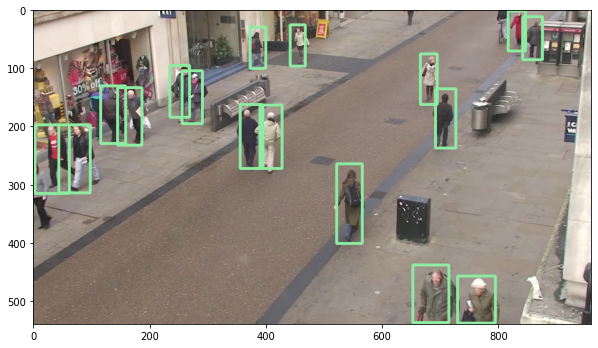

In [ ]:
res=model1.predict('/content/drive/MyDrive/toPredict/3446.jpg', random_color=False, show_text=False)

Metodo CCTV view:

In [ ]:
# definizioni metodo 1

from scipy.spatial import distance

# Ritorna il bottom center di ogni bbox
def mid_point(img,person,idx):
  x1,y1,x2,y2 = person.x1[idx], person.y1[idx], person.x2[idx], person.y2[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
  
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
  
  return mid

# Calcolo della distanza tra i vari midpoints 
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

# Riconoscimento di midpoints vicini da segnalare come bbox critiche
def find_closest_grid(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=average(thresh[i],thresh[j]))):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

# Modifica del colore dei bbox critici
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person.x1[i], person.y1[i], person.x2[i], person.y2[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)  
  return img

In [ ]:
# Definizione di una griglia di soglie per tenere conto della prospettiva
thresholds = [[60, 50, 40, 40, 40], 
              [60, 60, 45, 50, 50],
              [60, 50, 50, 60, 60],
              [60, 60, 60, 60, 70],
              [60, 60, 60, 85, 80]]

# Associazione midpoint-soglia corrispondente tramite posizione all'interno dell'immagine
def thresh_by_position(mid):
  j=int(mid[0]/200)
  i=int(mid[1]/100)
  if i == 5: i = 4
  return thresholds[i][j]

# Ritorna vettore di soglie con corrispondenza 1 a 1 per ogni midpoint
def get_thresh(midpoints, num):
  thresh = []
  for i in range(num):
    thresh_actual = thresh_by_position(midpoints[i])
    thresh.append(thresh_actual)
  return thresh

img shape:  (540, 960, 3)
# of bboxes: 14


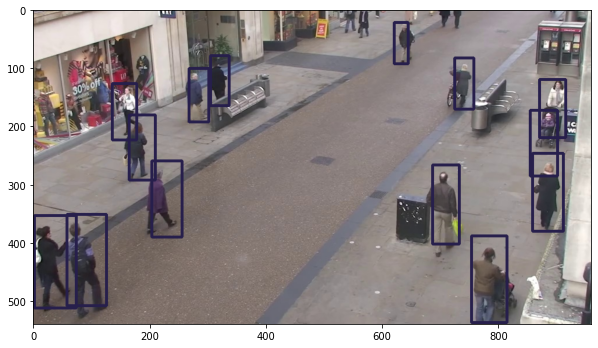

   p1  p2       dist
0   1   7  54.147945
1  10  12  45.607017


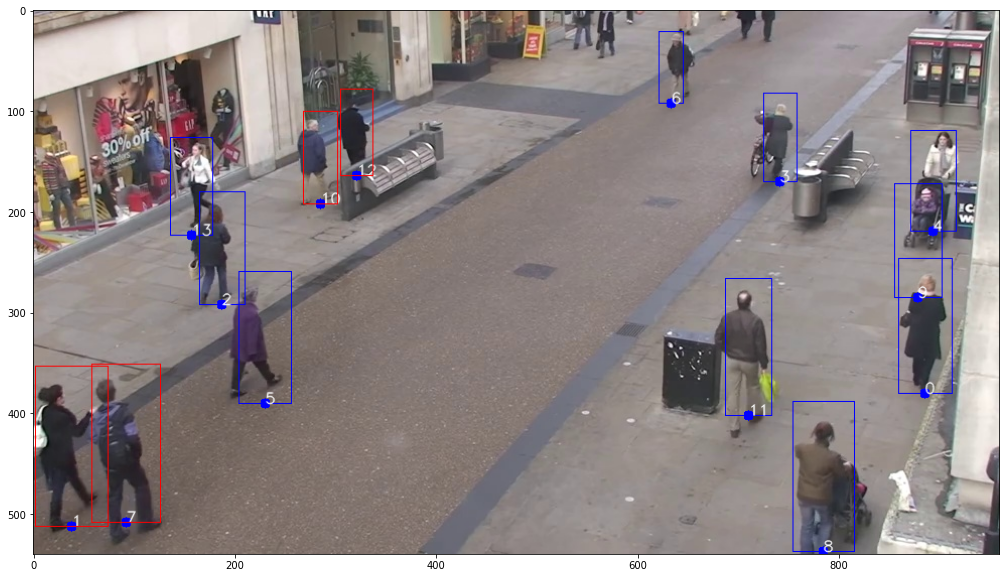

In [ ]:
# CCTV view computation
import numpy as np
import pandas as pd
import cv2
from skimage import io
import matplotlib.pyplot as plt

res=model1.predict('/content/drive/MyDrive/toPredict/324.jpg', random_color=False, show_text=False)
img = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/toPredict/324.jpg'), cv2.COLOR_BGR2RGB)

# Riconoscimento midpoints
midpoints = [mid_point(img,res,i) for i in range(len(res))]
num = len(midpoints)

# Calcolo distanza tra midpoints
dist = compute_distance(midpoints,num)

# Associazione midpoints-soglie
thresh = get_thresh(midpoints,num)

# Tracking bbox critiche
p1,p2,d=find_closest_grid(dist,num,thresh)

df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
print(df)

# Modifica colore bbox critiche
img = change_2_red(img,res,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

Metodo Bird-eye view:

In [ ]:
# definizioni metodo 2

# Ritorna la matrice di trasformazione e l'immagine trasformata
def compute_perspective_transform(corner_points,width,height,image):

  # Crea un array con i 4 punti di corner
	corner_points_array = np.float32(corner_points)
 
  # Crea un array con i parametri (dimensioni) richieste per costruire la matrice
	img_params = np.float32([[0,0],[width,0],[0,height],[width,height]])
 
  # Calcolo della matrice di trasformazione
	matrix = cv2.getPerspectiveTransform(corner_points_array,img_params) 
	img_transformed = cv2.warpPerspective(image,matrix,(width,height))
	return matrix,img_transformed


# Applica la trasformazione della prospettiva ad ogni punto individuato nell'immagine originale 
def compute_point_perspective_transformation(matrix,list_downoids):

	# Calcolo delle nuove coordinate
	list_points_to_detect = np.float32(list_downoids).reshape(-1, 1, 2)
	transformed_points = cv2.perspectiveTransform(list_points_to_detect, matrix)

  # Loop tra i punti che vengono aggiunti alla lista ritornata
	transformed_points_list = list()
	for i in range(0,transformed_points.shape[0]):
		transformed_points_list.append([transformed_points[i][0][0],transformed_points[i][0][1]])
	return transformed_points_list


def change_2_redv2(img,person,p1,p2):
  x1,y1,x2,y2 = person.x1[p1], person.y1[p1], person.x2[p1], person.y2[p1]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)  
  x1,y1,x2,y2 = person.x1[p2], person.y1[p2], person.x2[p2], person.y2[p2]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)  
  #return img

img shape:  (540, 960, 3)
# of bboxes: 14


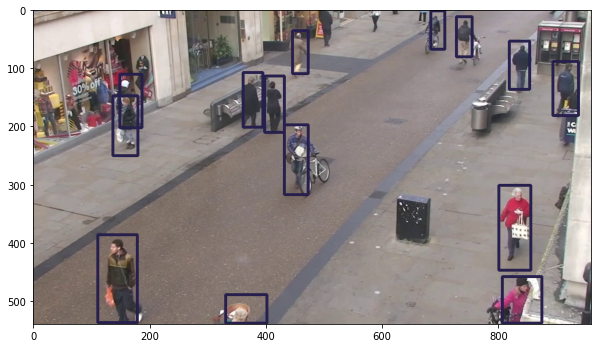

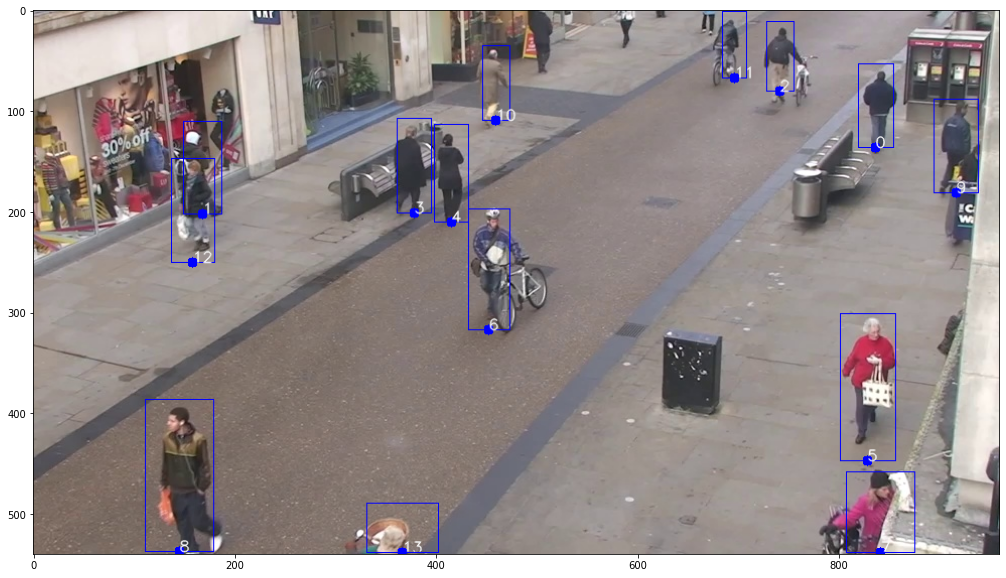

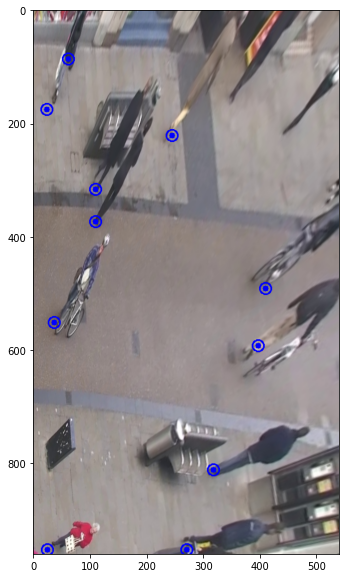

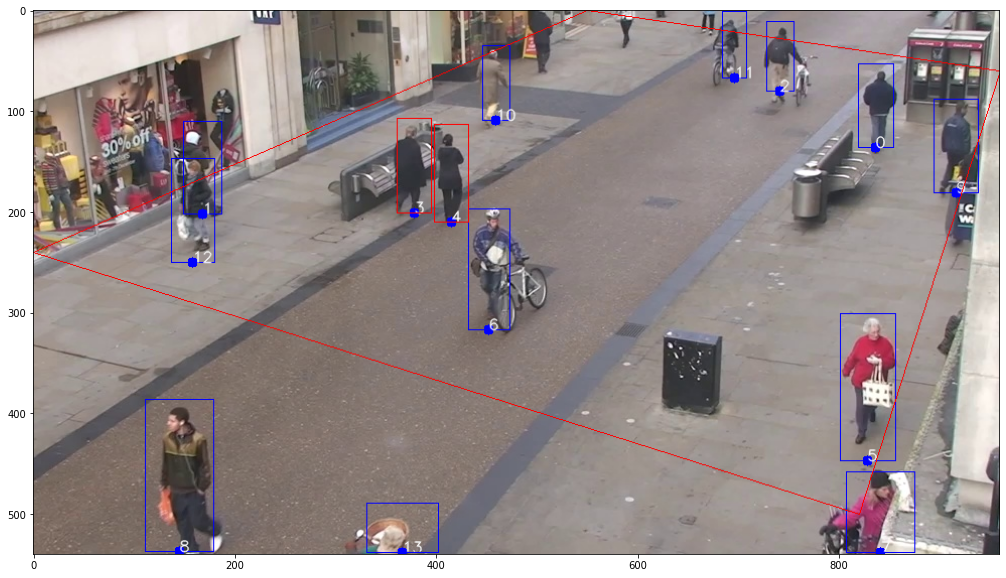

In [ ]:
# Bird-eye view computation

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import math

res = model1.predict('/content/drive/MyDrive/toPredict/0.jpg', random_color=False, show_text=False)
img = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/toPredict/0.jpg'), cv2.COLOR_BGR2RGB)

midpoints = [mid_point(img,res,i) for i in range(len(res))]

plt.figure(figsize=(20,10))
plt.imshow(img)

img1 = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/toPredict/0.jpg'), cv2.COLOR_BGR2RGB)

p1 = (0,240)
p2 = (550, 0)
p3 = (820, 500)
p4 = (960, 60)

width, height, _ = img1.shape

m, newimg = compute_perspective_transform(np.array((p1,p2,p3,p4)), width, height, img1)

transformed_downoids = compute_point_perspective_transformation(m, midpoints)
for point in transformed_downoids:
  x,y = point
  cv2.circle(newimg, (x,y), 10, (0, 0, 255), 2)
  cv2.circle(newimg, (x,y), 5, (0, 0, 255), -1)

plt.figure(figsize=(20,10))
plt.imshow(newimg)

# Valore di soglia unico grazie alla trasformazione della prospettiva
distance_minimum = 70

# Controlla se 2 o più persone sono state individuate (altrimenti non c'è bisogno di fare operazioni)
if len(transformed_downoids) >= 2:
  # Iterazione tra ogni possibile coppia di punti 
  list_indexes = list(itertools.combinations(range(len(transformed_downoids)), 2))

  for i,pair in enumerate(itertools.combinations(transformed_downoids, r=2)):
    if (pair[0][0] > 0 and pair[1][0] > 0 and pair[0][1] > 0 and pair[1][1] > 0):
      # Controllo sulla distanza della coppia tramite soglia
      if math.sqrt( (pair[0][0] - pair[1][0])**2 + (pair[0][1] - pair[1][1])**2 ) < int(distance_minimum):
        # Cambia i colori dei punti che sono troppo vicini
        #change_color_topview(pair)
    
        # Ottenimento degli indici di questi punti nell'immagine originale per cambiare colore a rosso
        index_pt1 = list_indexes[i][0]
        index_pt2 = list_indexes[i][1]
        change_2_redv2(img, res, index_pt1, index_pt2)

#disegna riquadro considerato
cv2.line(img,p1,p2,(255,0,0),1)
cv2.line(img,p2,p4,(255,0,0),1)
cv2.line(img,p3,p4,(255,0,0),1)
cv2.line(img,p3,p1,(255,0,0),1)

plt.figure(figsize=(20,10))
plt.imshow(img)